In [1]:
"""

Emulating the ratio of P_mg/P_lcdm for 


Requires the following installations:

1. R (R studio is the easiest option: https://www.rstudio.com/products/rstudio/download/).
Installing R packages is easy, in R studio, command install.packages("package_name") works
(https://www.dummies.com/programming/r/how-to-install-load-and-unload-packages-in-r/)
The following R packages are required:
    1a. RcppCNPy
    1b. DiceKriging
    1c. GPareto

2. rpy2 -- which runs R under the hood (pip install rpy2 should work)
# http://rpy.sourceforge.net/rpy2/doc-2.1/html/index.html
# conda install -c r rpy2

Built by N. Ramachandra and M. Binois 
"""

##### Generic packages ###############
import numpy as np
import matplotlib.pylab as plt
import time
import glob
import os
import SetPub
SetPub.set_pub()

###### R kernel imports from rpy2 #####
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

rpy2.robjects.numpy2ri.activate()
from rpy2.robjects import r
from rpy2.robjects.packages import importr

from itertools import cycle
import matplotlib.ticker as ticker


In [2]:

############################# PARAMETERS ##############################


dirIn = './Data/'

dataDir = "./Data/" ## Data folder
# modelDir = "./Models/" ## Data folder
plotsDir = "./Plots/" ## Data folder

paramIn = dataDir + 'mg.design'  ## 8 parameter file

fileIn = dataDir + ['ratios.txt', 'PMG.txt'][0]
nRankMax = 8 ## Number of basis vectors in truncated PCA
GPmodel = '"R_GP_model_flat3' + str(nRankMax) + '.RData"'  ## Double and single quotes are necessary
## DELETE the GPmodels or provide a new name if you want a new calculation
# num_holdout = 4
################################# I/O #################################
RcppCNPy = importr('RcppCNPy')
# RcppCNPy.chooseCRANmirror(ind=1) # select the first mirror in the list


loadFile = np.loadtxt(fileIn)

PmPl = loadFile[:, 1:].T
kvals = loadFile[:,0]

del_idx =  [5, 25, 4, 42]  ## holdouts for testing
PmPl = np.delete(PmPl, del_idx, axis = 0)




nr, nc = PmPl[:,:].shape
y_train = ro.r.matrix(PmPl[:,:], nrow=nr, ncol=nc)


ro.r.assign("y_train2", y_train)
r('dim(y_train2)')

parameter_array = np.loadtxt(paramIn)
#parameter_array = parameter_array[nan_idx]


parameter_array = np.delete(parameter_array, del_idx, axis = 0)



/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


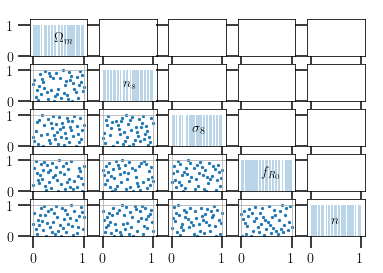

In [3]:

allLabels = [r'${\Omega}_m$', r'$n_s$', r'${\sigma}_8$', r'$f_{R_0}$', r'$n$']
lhd = parameter_array

PlotAll = False
num_para = 5

##
if PlotAll:
	import matplotlib.pylab as plt
	f, a = plt.subplots(num_para, num_para, sharex=True, sharey=True)
	plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
	plt.rcParams.update({'font.size': 8})

	for i in range(num_para):
            for j in range(i+1):
                print(i,j)
                if(i!=j):
                    a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
                # a[i, j].grid(True)
                # start, end = a[i, j].get_xlim()
                # a[i, j].set_xlim([start,end])

                # start, end = a[i, j].get_ylim()
                # a[i, j].set_ylim([start,end])
            else:
                a[i, i].text(0.4, 0.4, allLabels[i], size = 'xx-large')
                hist, bin_edges = np.histogram(lhd[:,i], density=True,  bins = 10)
                a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
                    #plt.savefig('LatinSq.png', figsize=(10, 10))
#plt.show()



PlotCheck = True
##
# if PlotCheck:
f, a = plt.subplots(num_para, num_para, sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})




def rescale01(f):
    return (f - np.min(f)) / (np.max(f) - np.min(f))


lhd = np.loadtxt(paramIn)
lhd = np.delete(lhd, del_idx, axis = 0)
allLabels = [r'${\Omega}_m$', r'$n_s$', r'${\sigma}_8$', r'$f_{R_0}$', r'$n$']


for i in range(num_para):
    lhd[:, i] = rescale01(lhd[:, i])


for i in range(num_para):
    for j in range(i+1):
        # print(i,j)
        if(i!=j):
            a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
            a[i, j].grid(True)
            # start, end = a[i, j].get_xlim()
            # a[i, j].set_xlim([start,end])

            # start, end = a[i, j].get_ylim()
            a[i, j].set_ylim(0, 1)
        else:
#             print(i,j)
            a[i, i].text(0.4, 0.4, allLabels[i], size = 'xx-large')
		    # hist, bin_edges = np.histogram(lhd[:,i], density=True, bins=5)
            # a[i, i].bar(bin_edges[:-1], hist/hist.max(), width=0.1, alpha = 0.1, color = 'k')
            a[i, i].hist(lhd[:, i], alpha = 0.3, bins=64)
            a[i, i].set_ylim(0, 1.2)
plt.savefig(plotsDir + 'LatinSq.png', figsize=(10, 10))
plt.show()



In [4]:

# f, a = plt.subplots(1, num_para, sharex=True, sharey=True)
# for i in range(num_para):
#     a[0].scatter(lhd[:, 0], lhd[:, 1])
#

nr, nc = parameter_array[:,:].shape
u_train = ro.r.matrix(parameter_array[:,:], nrow=nr, ncol=nc)

# parameter_array = parameter_array[rand_idx, :]

# nr, nc = parameter_array[num_holdout:, :].shape
# u_train = ro.r.matrix(parameter_array[num_holdout:, :], nrow=nr, ncol=nc)

ro.r.assign("u_train2", u_train)
r('dim(u_train2)')


########################### PCA ###################################
def PCA_decomp():
    Dicekriging = importr('DiceKriging')
    r('require(foreach)')
    ro.r.assign("nrankmax", nRankMax)
    r('svd(y_train2)')
    r('svd_decomp2 <- svd(y_train2)')
    r('svd_weights2 <- svd_decomp2$u[, 1:nrankmax] %*% diag(svd_decomp2$d[1:nrankmax])')


######################## GP FITTING ################################

## Build GP models
# This is evaluated only once for the file name. GP fitting is not required if the file exists.

def GP_fit():
    GPareto = importr('GPareto')

    ro.r('''

    GPmodel <- gsub("to", "",''' + GPmodel + ''')

    ''')

    r('''if(file.exists(GPmodel)){
            load(GPmodel)
        }else{
            models_svd2 <- list()
            for (i in 1: nrankmax){
                mod_s <- km(~., design = u_train2, response = svd_weights2[, i])
                models_svd2 <- c(models_svd2, list(mod_s))
            }
            save(models_svd2, file = GPmodel)

         }''')

    # r('''''')


######################## GP PREDICTION ###############################


def GP_predict(para_array):
    ### Input: para_array -- 1D array [rho, sigma, tau, sspt]
    ### Output P(x) (size= 100)

    para_array = np.expand_dims(para_array, axis=0)

    nr, nc = para_array.shape
    Br = ro.r.matrix(para_array, nrow=nr, ncol=nc)

    ro.r.assign("Br", Br)

    r('wtestsvd2 <- predict_kms(models_svd2, newdata = Br , type = "UK")')
    r('reconst_s2 <- t(wtestsvd2$mean) %*% t(svd_decomp2$v[,1:nrankmax])')

    y_recon = np.array(r('reconst_s2'))

    return y_recon[0]




######### TEMPLATE FOR MCMC LIKELIHOOD FUNCTION #######################
# For emcee

def lnlike(theta, x, y, yerr):
    p1, p2, p3, p4, p5 = theta

    new_params = np.array([p1, p2, p3, p4, p5])

    model = GP_predict(new_params)
    # return -0.5 * (np.sum(((y - model) / yerr) ** 2.))
    return -0.5 * (np.sum(((y - model) / yerr) ** 2.))





R[write to console]: Loading required package: foreach



Time per emulation 0.01  s
Time per emulation 0.02  s
Time per emulation 0.01  s
Time per emulation 0.01  s


/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


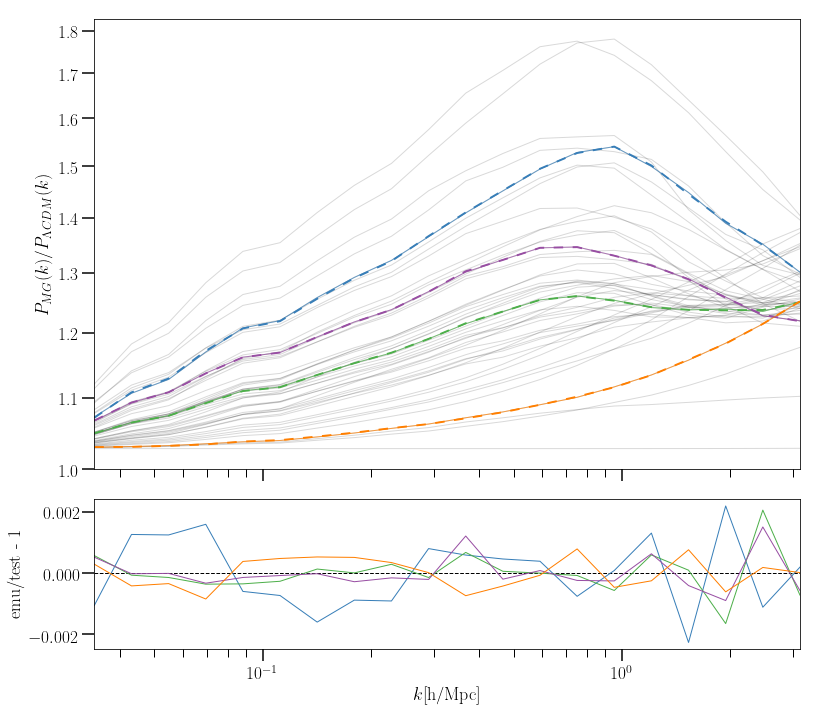

In [5]:

##################################### TESTING ##################################



PCA_decomp()
GP_fit()



PlotPrior = True

if PlotPrior:

#    plt.rcParams['axes.color_cycle'] = [ 'navy', 'forestgreen', 'darkred', 'gold']


    plt.rc('text', usetex=True)  # Slower
    plt.rc('font', size=12)  # 18 usually

    plt.figure(999, figsize=(14, 12))
    from matplotlib import gridspec

    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
    gs.update(hspace=0.1, left=0.2, bottom=0.15, wspace=0.25)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$',  fontsize = 18)

    # ax1.axhline(y=-1e-6, ls='dashed')
    # ax1.axhline(y=1e-6, ls='dashed')

    ax1.set_xlabel(r'$k$[h/Mpc]',  fontsize = 18)
    ax1.axhline(y=0, ls='dashed')


    ax0.set_yscale('log')
    ax0.set_xscale('log')
    ax1.set_xscale('log')

    ax1.set_ylabel(r'emu/test - 1',  fontsize = 18)
    # ax1.set_ylim(-5e-3, 5e-3)

    ax0.plot(kvals, PmPl.T, alpha=0.15, color='k')

    start, end = ax0.get_ylim()
    ax0.yaxis.set_ticks((np.arange(start, end, 0.1)))
    ax0.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

# ax1.set_ylim(-5e-4, 5e-4)


ax0.set_xlim(kvals[0], kvals[-1])
ax1.set_xlim(kvals[0], kvals[-1])

ax0.set_xticklabels([])



color_id = 0
for x_id in del_idx:
    color_id = color_id + 1
#


# for x_id in [13, 24, 64, 83, 109]:
# for x_id in range(0, num_holdout):

    time0 = time.time()
    x_decodedGPy = GP_predict(parameter_array[x_id])  ## input parameters
    time1 = time.time()
    print('Time per emulation %0.2f' % (time1 - time0), ' s')
    x_test = PmPl[x_id]

    ax0.plot(kvals, x_decodedGPy, alpha=1.0, ls='--', lw = 1.9, dashes=(5, 5), label='emu', color=plt.cm.Set1(color_id))
    ax0.plot(kvals, x_test, alpha=0.7, label='test', color=plt.cm.Set1(color_id))

    #ax0.loglog(kvals, x_decodedGPy, alpha=1.0, ls='--', lw = 1.9, dashes=(5, 5), label='emu', color=plt.cm.Set1(color_id))
    #ax0.loglog(kvals, x_test, alpha=0.7, label='test', color=plt.cm.Set1(color_id))


#     plt.legend()

    ax1.plot( kvals, (x_decodedGPy[:]) / (x_test[:])  - 1, color=plt.cm.Set1(color_id))


plt.savefig(plotsDir + "Emu.png",  bbox_inches="tight", dpi=200)

plt.show()






[1.2e-01 8.5e-01 7.0e-01 1.0e-08 0.0e+00]
[1.55e-01 1.05e+00 9.00e-01 1.00e-04 4.00e+00]
[1.374e-01 9.513e-01 8.019e-01 4.872e-05 1.961e+00]
0
1
2
3
4


/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


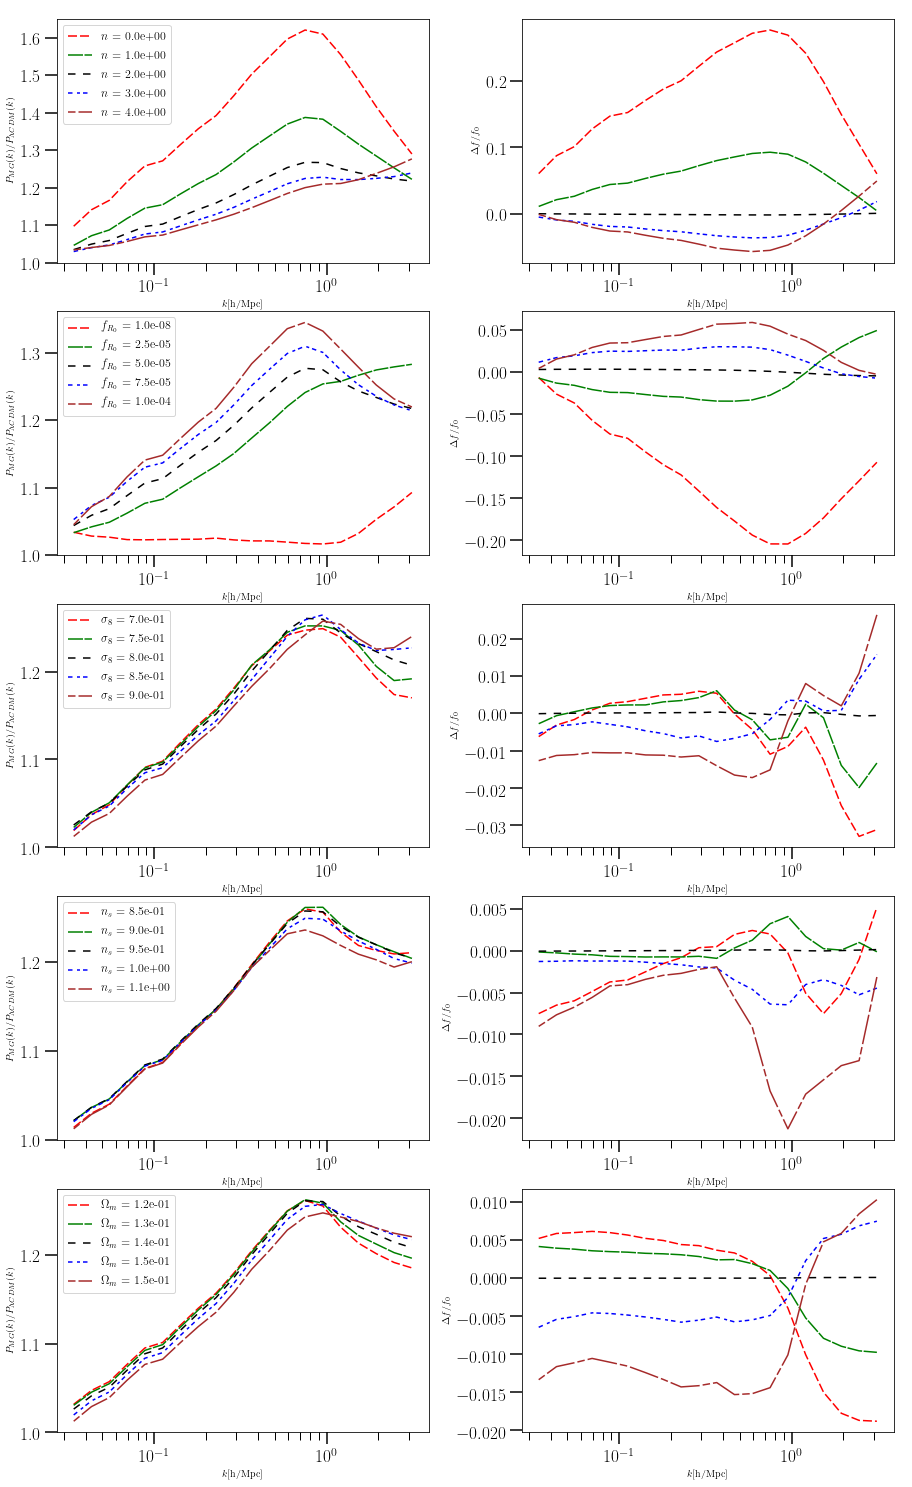

In [6]:


allMax = np.max(parameter_array, axis = 0)
allMin = np.min(parameter_array, axis = 0)
allMean = np.mean(parameter_array, axis = 0)

#allMean = 0.5*(allMax - allMin)

print(allMin)
print(allMax)
print(allMean)
Pk_mean = GP_predict(allMean) 


PlotCls = True

numPlots = 5

fig, ax = plt.subplots(5,2, figsize = (15,26))
# fig = plt.figure()
# fig.add_subplot(221)   #top left
# fig.add_subplot(222)   #top right
# fig.add_subplot(223)   #bottom left
# fig.add_subplot(224)   #bottom right
# plt.show()
plt.subplots_adjust(wspace=0.25)

if PlotCls:
    for paramNo in range(5):
        print(paramNo)
        para_range = np.linspace(allMin[paramNo], allMax[paramNo], numPlots)

        #plt.figure(32)
        lines = ["-","-.","--",":"]
        linecycler = cycle(lines)
        dashList = [(6,2),(10,1),(5,5),(3,3,2,2),(5,2,20,2)]
        colorList = ['r', 'g', 'k', 'b', 'brown']


        for plotID in range(numPlots):
            para_plot = np.copy(allMean)
            para_plot[paramNo] = para_range[plotID]  #### allMean gets changed everytime!!
            x_decodedGPy = GP_predict(para_plot) 
            lineObj = ax[4-paramNo,0].plot(kvals, x_decodedGPy, lw= 1.5, linestyle='--', dashes=dashList[plotID], color = colorList[plotID], label = allLabels[paramNo] + ' = %.1e'%para_range[plotID])
            #ax[paramNo,0].set_ylim(9.9, None)
            #ax[4-paramNo,0].set_yscale('log')
            ax[4-paramNo,0].set_xscale('log')
            ax[4-paramNo,0].set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$')
            ax[4-paramNo,0].set_xlabel('$k$[h/Mpc]')
            #ticks = np.linspace(np.min(10**x_decodedGPy), np.max(10**x_decodedGPy), 5)
            #ticks = np.array([10, 15, 20, 25, 30, 35, 40])
            #ax[4-paramNo,0].set_yticks(ticks, minor = True)
            ax[4-paramNo,0].set_yticks([], minor = True)
            ax[4-paramNo,0].legend(iter(lineObj), para_range.round(decimals=2), title = allLabels[paramNo])
            ax[4-paramNo,0].legend()
            #ax[paramNo,0].legend(title = allLabels[paramNo])
            #ax[paramNo,1].set_yscale('log')
            ax[4-paramNo,1].set_xscale('log')
            ax[4-paramNo,1].set_ylabel(r'$\Delta f / f_0$')
            ax[4-paramNo,1].set_xlabel('$k$[h/Mpc]')
            #ax[paramNo,0].legend(iter(lineObj), para_range.round(decimals=2), title = allLabels[paramNo])
            #ax[paramNo,0].legend(title = allLabels[paramNo])
            ax[4-paramNo,1].plot(kvals, (x_decodedGPy)/(Pk_mean) - 1, lw= 1.5, linestyle='--', dashes=dashList[plotID], color = colorList[plotID], label = para_range[plotID] )


        start, end = ax[4-paramNo, 0].get_ylim()
        ax[4-paramNo, 0].yaxis.set_ticks( (np.arange(start, end, 0.1)))
        ax[4-paramNo, 0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))


fig.savefig(plotsDir + "sensitivity.png",  bbox_inches="tight", dpi=200)

plt.show()



